## mi paper AES según AI Paper to Code

In [6]:
import random
import numpy as np

random.seed(1)
np.object = object  # Set np.object to object

import tensorflow as tf

session_conf = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

tf.compat.v1.set_random_seed(1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)


In [7]:
print(tf.config.list_physical_devices('GPU'))

[]


In [8]:
print(tf.__version__)



2.13.0


In [9]:
import platform
print(platform.python_version())

3.8.19


In [10]:

import os
import numpy as np
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt


In [11]:
import numpy as np

def sustituir_mayores_que_cero(x_train, y_pred):
    """
    Sustituye los puntos correspondientes en el array de salida (y_pred)
    por los valores del array de entrada (x_train) que sean mayores que cero.

    Iguala las dimensiones de los arrays si son diferentes antes de realizar la operación.

    Args:
        x_train (np.ndarray): El array de entrada.
        y_pred (np.ndarray): El array de salida.

    Returns:
        np.ndarray: El array de salida modificado.
    """
    y_pred = np.squeeze(y_pred,axis=-1)
    
    # Creamos una copia del array de salida para evitar modificar el original
    y_pred_corr = np.copy(y_pred)
    
    # Encontramos los índices donde los valores en x_train son mayores que cero
    idx = x_train > 0
    
    # Sustituimos los valores correspondientes en y_pred
    y_pred_corr[idx] = x_train[idx]
    
    return y_pred_corr

In [12]:
import numpy as np

def calcular_mse(modelo, x, y):
    """
    Calcula el error cuadrático medio (MSE) entre las predicciones del modelo y los datos de salida.

    Parámetros:
    - modelo: El modelo de TensorFlow/Keras ya entrenado.
    - x: Datos de entrada.
    - y: Datos de salida reales.

    Retorna:
    - El valor del MSE.
    """
    # Realizar predicciones con el modelo
    y_pred = modelo.predict(x)
    
    error=MSE(y_pred, y)
    
    return error

In [13]:
def MSE(y_pred, y):

# Obtener las formas de y_pred y y
    shape_pred = np.shape(y_pred)
    shape_y = np.shape(y)
    
    # Ajustar las formas si son diferentes
    if shape_pred != shape_y:
        # Obtener la longitud de la forma más grande para asegurarse de que no se pierdan datos
        max_length = max(len(shape_pred), len(shape_y))
        # Rellenar las formas con 1 para que tengan la misma longitud
        shape_pred += (1,) * (max_length - len(shape_pred))
        shape_y += (1,) * (max_length - len(shape_y))
        # Ajustar las formas para que tengan el mismo tamaño
        y_pred = np.reshape(y_pred, shape_y)
        y = np.reshape(y, shape_pred)

    # Calcular el error cuadrático medio
    mse = np.mean((y_pred - y)**2)

    return mse

In [14]:
def create_spl_image(df):
    # Filtrar las columnas de frecuencias entre 20 y 20000 Hz
    df_filtered = df.iloc[:, 5:]  # Excluye la primera columna de etiquetas de frecuencia

    # Añadir 60 dB a todos los valores de SPL para evitar valores negativos
    df_filtered = df_filtered + 60

    # Obtener las dimensiones de la imagen
    num_frequencies, num_measurements = df_filtered.shape

    # Crear una imagen en blanco (matriz NumPy) con las dimensiones correctas
    image = np.zeros((num_measurements, num_frequencies), dtype=np.uint8)

    # Llenar la imagen con los valores de atenuación convertidos a enteros
    # image = (df_filtered.values * (255 / 60)).astype(np.uint8)
    image = (df_filtered.values).astype(np.uint8)
    image = Image.fromarray(image)

    # Crear una figura y ejes para mostrar la imagen
    fig, ax = plt.subplots(figsize=(12, 8))

    # Mostrar la imagen en escala de grises
    ax.imshow(image, cmap='gray', aspect='auto', vmin=0, vmax=255)

    # Configurar etiquetas de ejes
    ax.set_xlabel('Frequency Index')
    ax.set_ylabel('Measurement Index')

    # Configurar el título
    ax.set_title('Attenuation Image')

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

    return image

In [15]:
from PIL import Image
import os
import numpy as np

def cargar_dataset(ruta_carpeta, mode='normal'):
    entradas = []
    salidas = []

    for archivo in os.listdir(ruta_carpeta):
        if archivo.endswith(".png"):
            ruta_completa = os.path.join(ruta_carpeta, archivo)
            imagen = Image.open(ruta_completa)


            # quitamos las dos primeras columnas para quedarnos con imágenes de 44 columnas, para evitar problemas con downsampling upsamplin en la u-net
            # Convertir la imagen PIL a una matriz numpy
            imagen_array = np.array(imagen)

            # Eliminar las dos primeras columnas de la imagen
            imagen = imagen_array[:, 2:]/60   # dividido 60 para normalizar a 1

            # Convertir la matriz numpy de vuelta a una imagen PIL
            imagen = Image.fromarray(imagen)

            # Si la imagen es de entrada (only polars)
            if archivo.endswith("_op.png"):
              if archivo.endswith("_esp_op.png"):
                 if mode=='espiral':
                    entradas.append(np.array(imagen))
                    print('entradas')
                    print(archivo)
                    print(mode)

              else:
                if mode=='normal':
                    entradas.append(np.array(imagen))
                    print('entradas')
                    print(archivo)
                    print(mode)


            # Si la imagen es de salida
            else:
              if archivo.endswith("_esp.png"):
                 if mode=='espiral':
                    salidas.append(np.array(imagen))
                    print('salidas')
                    print(archivo)
                    print(mode)
              else:
                if mode=='normal':
                    salidas.append(np.array(imagen))
                    print('salidas')
                    print(archivo)
                    print(mode)

    return np.array(entradas), np.array(salidas)




In [16]:
from PIL import Image
import os
import numpy as np

def cargar_dataset_90(ruta_carpeta, mode='normal', input_mode='op'):
    entradas = []
    salidas = []

    for archivo in os.listdir(ruta_carpeta):
        if archivo.endswith(".png"):
            ruta_completa = os.path.join(ruta_carpeta, archivo)
            imagen = Image.open(ruta_completa)


            # quitamos las dos primeras columnas para quedarnos con imágenes de 44 columnas, para evitar problemas con downsampling upsamplin en la u-net
            # Convertir la imagen PIL a una matriz numpy
            imagen_array = np.array(imagen)

            # Eliminar las dos primeras columnas de la imagen
            imagen = imagen_array[:, 2:]/60   # dividido 60 para normalizar a 1

            # Convertir la matriz numpy de vuelta a una imagen PIL
            imagen = Image.fromarray(imagen)

            # Si la imagen es de entrada (only polars)
            if archivo.endswith("_op.png"):
              if archivo.endswith("_esp_90_op.png") and input_mode=='90_op':
                 if mode=='espiral':
                    entradas.append(np.array(imagen))
                    print('entradas')
                    print(archivo)
                    print(mode)
                    print(input_mode)

              elif archivo.endswith("_esp_op.png") and input_mode=='op':
                 if mode=='espiral':
                    entradas.append(np.array(imagen))
                    print('entradas')
                    print(archivo)
                    print(mode)
                    print(input_mode)

              else:
                if archivo.endswith("90_op.png") and input_mode=='90_op':
                  if mode=='normal':
                      entradas.append(np.array(imagen))
                      print('entradas')
                      print(archivo)
                      print(mode)
                      print(input_mode)

                else:
                  if archivo.endswith("_op.png") and input_mode=='90_op':
                    if mode=='normal':
                        entradas.append(np.array(imagen))
                        print('entradas')
                        print(archivo)
                        print(mode)
                        print(input_mode)


            # Si la imagen es de salida
            else:
              if archivo.endswith("_esp.png"):
                 if mode=='espiral':
                    salidas.append(np.array(imagen))
                    print('salidas')
                    print(archivo)
                    print(mode)
                    print(input_mode)
              else:
                if mode=='normal':
                    salidas.append(np.array(imagen))
                    print('salidas')
                    print(archivo)
                    print(mode)
                    print(input_mode)

    return np.array(entradas), np.array(salidas)





In [17]:
def get_layer_details(model, verbose=0):
    layers = []
    for layer in model.layers:
        if isinstance(layer, (Conv2D, MaxPooling2D, UpSampling2D)):
            layer_name = layer.name
            input_shape = layer.input_shape
            output_shape = layer.output_shape
            if isinstance(layer, Conv2D):
                stride = str(layer.strides) if layer.strides != (1, 1) else 'NA'
                padding = layer.padding
                kernel_size = layer.kernel_size
            else:
                stride = 'NA'
                padding = 'NA'
                kernel_size = 'NA'
            layers.append([layer_name, input_shape, stride, padding, kernel_size, output_shape])

    if verbose:
        print("{:<20} {:<20} {:<15} {:<15} {:<15} {:<20}".format('Layer', 'Input size', 'Stride', 'Padding', 'Kernel size', 'Output size'))
        for layer in layers:
            layer_name, input_shape, stride, padding, kernel_size, output_shape = layer
            input_shape_str = str(input_shape[1:]) if input_shape else 'NA'
            output_shape_str = str(output_shape[1:]) if output_shape else 'NA'
            stride_str = str(stride) if stride != 'NA' else 'NA'
            padding_str = str(padding) if padding != 'NA' else 'NA'
            kernel_size_str = str(kernel_size) if kernel_size != 'NA' else 'NA'
            print("{:<20} {:<20} {:<15} {:<15} {:<15} {:<20}".format(layer_name, input_shape_str, stride_str, padding_str, kernel_size_str, output_shape_str))

    return layers




In [18]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

def image_to_dataframe(image):
    # Obtener las dimensiones de la imagen
    height, width = image.shape

    # Crear índices para filas y columnas
    row_index = [f'Row_{i}' for i in range(height)]
    # col_index = [f'Col_{j}' for j in range(width)]
    col_index = ['128.90625',
       '140.625', '164.0625', '175.78125', '199.21875', '222.65625',
       '257.8125', '281.25', '316.40625', '351.5625', '398.4375', '445.3125',
       '503.90625', '562.5', '632.8125', '714.84375', '796.875', '902.34375',
       '1007.8125', '1136.71875', '1265.625', '1429.6875', '1605.46875',
       '1792.96875', '2015.625', '2261.71875', '2542.96875', '2847.65625',
       '3199.21875', '3597.65625', '4031.25', '4523.4375', '5074.21875',
       '5707.03125', '6398.4375', '7183.59375', '8062.5', '9046.875',
       '10160.15625', '11402.34375', '12796.875', '14367.1875', '16125.0',
       '18105.46875']

    # Crear el DataFrame con los índices
    #df = pd.DataFrame(index=row_index, columns=col_index)
    df = pd.DataFrame(columns=col_index)

    # Rellenar el DataFrame con los valores de los píxeles
    for i in range(height):
        for j in range(width):
            df.loc[f'Row_{i}', col_index[j]] = float(image[i, j])

    # Ahora completamos el df con las columnas de las coordenadas
    #columns_names=['Phi','Theta','x', 'y', 'z']
    df.insert(0,'z', np.nan)
    df.insert(0,'y', np.nan)
    df.insert(0,'x', np.nan)
    df.insert(0,'Theta', np.nan)
    df.insert(0,'Phi', np.nan)
    resol=5
    row=0
    for phi in range(0,360,resol):
        for theta in range(0,185,resol):

          cos = np.cos
          sin = np.sin
          deg2rad= np.deg2rad

          df['Phi'].iloc[row]=phi
          df['Theta'].iloc[row]=theta
          df['x'].iloc[row]=np.array(cos(deg2rad(phi))*sin(deg2rad(theta)))
          df['y'].iloc[row]=np.array(sin(deg2rad(phi))*sin(deg2rad(theta)))
          df['z'].iloc[row]= np.array(cos(deg2rad(theta)))

          row=row+1
    df=df.astype(float)
    return df

In [19]:


import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)



def image_to_dataframe_espiral_original(image):
    # Obtener las dimensiones de la imagen
    height, width = image.shape

    # Crear índices para filas y columnas
    row_index = [f'Row_{i}' for i in range(height)]
    # col_index = [f'Col_{j}' for j in range(width)]
    col_index = ['128.90625',
       '140.625', '164.0625', '175.78125', '199.21875', '222.65625',
       '257.8125', '281.25', '316.40625', '351.5625', '398.4375', '445.3125',
       '503.90625', '562.5', '632.8125', '714.84375', '796.875', '902.34375',
       '1007.8125', '1136.71875', '1265.625', '1429.6875', '1605.46875',
       '1792.96875', '2015.625', '2261.71875', '2542.96875', '2847.65625',
       '3199.21875', '3597.65625', '4031.25', '4523.4375', '5074.21875',
       '5707.03125', '6398.4375', '7183.59375', '8062.5', '9046.875',
       '10160.15625', '11402.34375', '12796.875', '14367.1875', '16125.0',
       '18105.46875']

    # Crear el DataFrame con los índices
    #df = pd.DataFrame(index=row_index, columns=col_index)
    df = pd.DataFrame(columns=col_index)

    # Rellenar el DataFrame con los valores de los píxeles
    for i in range(height):
        for j in range(width):
            df.at[f'Row_{i}', col_index[j]] = float(image[i, j])

        # Ahora completamos el df con las columnas de las coordenadas
    columns_names=['Phi','Theta','x', 'y', 'z']
    df.insert(0,'z', np.nan)
    df.insert(0,'y', np.nan)
    df.insert(0,'x', np.nan)
    df.insert(0,'Theta', np.nan)
    df.insert(0,'Phi', np.nan)

    print(df.shape)

    resol=5
    row=0
    for phi in range(0,180,resol):
        for theta in range(0,181,resol):

          cos = np.cos
          sin = np.sin
          deg2rad= np.deg2rad

          df['Phi'].iloc[row]=phi
          df['Theta'].iloc[row]=theta
          df['x'].iloc[row]=np.array(cos(deg2rad(phi))*sin(deg2rad(theta)))
          df['y'].iloc[row]=np.array(sin(deg2rad(phi))*sin(deg2rad(theta)))
          df['z'].iloc[row]= np.array(cos(deg2rad(theta)))

          #print('row = ' + str(row))
          #print('Phi = ' + str(phi))
          #print('Theta = ' + str(theta))
          row=row+1

        row=int(row+(180/resol+1))
    print(df.shape)
    row=int(180/resol+1)
    for phi in range(180,356,resol):
        for theta in range(180,-1,-resol):

          cos = np.cos
          sin = np.sin

          df['Phi'].iloc[row]=phi
          df['Theta'].iloc[row]=theta
          df['x'].iloc[row]=np.array(cos(deg2rad(phi))*sin(deg2rad(theta)))
          df['y'].iloc[row]=np.array(sin(deg2rad(phi))*sin(deg2rad(theta)))
          df['z'].iloc[row]= np.array(cos(deg2rad(theta)))

          #print('row = ' + str(row))
          #print('Phi = ' + str(phi))
          #print('Theta = ' + str(theta))
          row=row+1

        row=int(row+(180/resol+1))
    #print(df.shape)
    df=df.astype(float)
    return df

In [20]:


import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)



def image_to_dataframe_espiral(image):
    # Obtener las dimensiones de la imagen
    height, width = image.shape

    # Crear índices para filas y columnas
    row_index = [f'Row_{i}' for i in range(height)]
    # col_index = [f'Col_{j}' for j in range(width)]
    col_index = ['128.90625',
       '140.625', '164.0625', '175.78125', '199.21875', '222.65625',
       '257.8125', '281.25', '316.40625', '351.5625', '398.4375', '445.3125',
       '503.90625', '562.5', '632.8125', '714.84375', '796.875', '902.34375',
       '1007.8125', '1136.71875', '1265.625', '1429.6875', '1605.46875',
       '1792.96875', '2015.625', '2261.71875', '2542.96875', '2847.65625',
       '3199.21875', '3597.65625', '4031.25', '4523.4375', '5074.21875',
       '5707.03125', '6398.4375', '7183.59375', '8062.5', '9046.875',
       '10160.15625', '11402.34375', '12796.875', '14367.1875', '16125.0',
       '18105.46875']

    # Crear el DataFrame con los índices
    #df = pd.DataFrame(index=row_index, columns=col_index)
    df = pd.DataFrame(columns=col_index)

    # Rellenar el DataFrame con los valores de los píxeles
    for i in range(height):
        for j in range(width):
            df.at[f'Row_{i}', col_index[j]] = float(image[i, j])

        # Ahora completamos el df con las columnas de las coordenadas
    columns_names=['Phi','Theta','x', 'y', 'z']
    df.insert(0,'z', np.nan)
    df.insert(0,'y', np.nan)
    df.insert(0,'x', np.nan)
    df.insert(0,'Theta', np.nan)
    df.insert(0,'Phi', np.nan)

    print(df.shape)

    resol=5
    row=0
    for phi in range(0,180,resol):
        for theta in range(0,181,resol):

          cos = np.cos
          sin = np.sin
          deg2rad= np.deg2rad

          df.loc[f'Row_{row}', 'Phi'] = phi
          df.loc[f'Row_{row}', 'Theta'] = theta
          df.loc[f'Row_{row}', 'x'] = cos(deg2rad(phi)) * sin(deg2rad(theta))
          df.loc[f'Row_{row}', 'y'] = sin(deg2rad(phi)) * sin(deg2rad(theta))
          df.loc[f'Row_{row}', 'z'] = cos(deg2rad(theta))

          #print('row = ' + str(row))
          #print('Phi = ' + str(phi))
          #print('Theta = ' + str(theta))
          row=row+1

        row=int(row+(180/resol+1))
    print(df.shape)
    row=int(180/resol+1)
    for phi in range(180,356,resol):
        for theta in range(180,-1,-resol):

          cos = np.cos
          sin = np.sin

          df.loc[f'Row_{row}', 'Phi'] = phi
          df.loc[f'Row_{row}', 'Theta'] = theta
          df.loc[f'Row_{row}', 'x'] = cos(deg2rad(phi)) * sin(deg2rad(theta))
          df.loc[f'Row_{row}', 'y'] = sin(deg2rad(phi)) * sin(deg2rad(theta))
          df.loc[f'Row_{row}', 'z'] = cos(deg2rad(theta))

          #print('row = ' + str(row))
          #print('Phi = ' + str(phi))
          #print('Theta = ' + str(theta))
          row=row+1

        row=int(row+(180/resol+1))
    #print(df.shape)
    df=df.astype(float)
    return df

In [21]:
def plot_polar_plane(FR, freq, resol, phi, rel=1, FR2=0): # rel=1 means that polar plot takes on-axis value as 0 dB # from_picture=1 means dataset without coordinates columns
    import numpy as np
    import matplotlib.pyplot as plt
    try:
        if FR2==0:
            FR2=FR
    except:
        FR2=FR2
    ############

    # primera frecuencia mayor o igual a freq Hz sería
    frequencies=np.array(FR.columns[5:])

    frequencies=frequencies.astype(float)
    x=np.where(frequencies>=freq)
    x=x[0][0]+5 # +5 porque las dos primeras columnas son los ángulaos theta phi y las tres siguientes x,y,z
    frequency_x=[FR.columns[x]]

    fig = plt.figure(2)
    for frequency in frequency_x:
        x=np.array(FR['Theta'][int((phi/resol)*((180/resol)+1)):int((phi/resol)*((180/resol)+1)+37)])
        x=x.astype(float)
        y=np.array(FR[frequency][int((phi/resol)*((180/resol)+1)):int((phi/resol)*((180/resol)+1)+37)])
        y2=np.array(FR2[frequency][int((phi/resol)*((180/resol)+1)):int((phi/resol)*((180/resol)+1)+37)])
        x=np.deg2rad(x)
        if rel==1:
            y=y-y[0]
            y2=y2-y2[0]
        #fig = plt.figure()
        ax = fig.add_subplot(111, polar=True)
        if rel==1:
          ax.set_ylim([-40,10])
        ax.plot(x, y,'g', x, y2,'r')
        x=-x
        y=np.array(FR[frequency][int(((phi+180)/resol)*((180/resol)+1)):int(((phi+180)/resol)*((180/resol)+1)+37)])
        y2=np.array(FR2[frequency][int(((phi+180)/resol)*((180/resol)+1)):int(((phi+180)/resol)*((180/resol)+1)+37)])
        if rel==1:
            y=y-y[0]
            y2=y2-y2[0]
        ax.plot(x, y,'g', x, y2,'r')

        plt.ylabel('Attenuation (dB)')
        title='Polar plot at '+str(phi)+ 'º Phi angle at '+frequency+ ' Hz'
        plt.title(title)

    return

In [22]:
# funciones para deshacer reordenar un dataset en espiral: phi: 0, 5, 10, 15, 20, 25, ... y para cada phi las thetas van en orden ascendente

import pandas as pd

def deshacer_reordenar_phi(IR_balloon, resol):
    # Crea la secuencia de ordenación de phi: 0, 5, 10, 15, ....355
    phi_order = []
    for i in range(72):
        phi_order.extend([i * resol])

    # Filtra el dataset para incluir solo los valores de phi en el orden especificado
    IR_balloon_reordenado = IR_balloon[IR_balloon['Phi'].isin(phi_order)]

    # Convierte la columna 'Phi' a tipo categoría con el orden específico
    IR_balloon_reordenado['Phi'] = pd.Categorical(IR_balloon_reordenado['Phi'], categories=phi_order, ordered=True)

    # Ordena el dataset basándose en la columna 'Phi'
    IR_balloon_reordenado = IR_balloon_reordenado.sort_values(by=['Phi'])

    return IR_balloon_reordenado

def deshacer_reordenar_theta(IR_balloon_reordenado_phi, resol):
    # Inicializa una lista para almacenar el orden de theta

    # Inicializa el DataFrame final
    IR_balloon_reordenado = pd.DataFrame(columns=IR_balloon_reordenado_phi.columns)

    # Recorre el DataFrame por bloques de phi
    for phi_block in IR_balloon_reordenado_phi.groupby('Phi'):
        phi, phi_data = phi_block

        # Ordena el bloque actual por los valores de theta
        phi_data_sorted = phi_data.sort_values(by='Theta')

        # Concatena el bloque ordenado al DataFrame final
        IR_balloon_reordenado = pd.concat([IR_balloon_reordenado, phi_data_sorted])


    return IR_balloon_reordenado






def deshacer_reordenar_phi_theta(IR_balloon, resol):
    # Utiliza la función reordenar_phi para obtener el DataFrame ordenado por phi

    #IR_balloon_reordenado_phi = deshacer_reordenar_phi(IR_balloon, resol)
    IR_balloon_reordenado_phi=IR_balloon

    # Utiliza la función reordenar_theta para ordenar theta dentro de cada bloque de phi
    IR_balloon_reordenado_phi_theta = deshacer_reordenar_theta(IR_balloon_reordenado_phi, resol)
    #IR_balloon_reordenado_phi_theta= IR_balloon_reordenado_phi_theta.reset_index(drop=True)

    return IR_balloon_reordenado_phi_theta

In [23]:
import numpy as np

def filas_con_valores_distintos_de_cero(imagen):
    # Convertir la imagen a un array numpy
    imagen_array = np.array(imagen)
    
    # Obtener la suma de cada fila (axis=1)
    suma_filas = np.sum(imagen_array, axis=1)
    
    # Filtrar las filas con valores distintos de cero
    filas_no_cero = np.nonzero(suma_filas)[0]
    
    return filas_no_cero




In [24]:
import matplotlib.pyplot as plt

def plot_images(input_images, output_images, predicted_images=None, vmin=0, vmax=60):
    """
    Genera gráficos para visualizar imágenes de entrada, salida y predichas (opcional).

    Args:
        input_images (np.ndarray): Array de imágenes de entrada.
        output_images (np.ndarray): Array de imágenes de salida.
        predicted_images (np.ndarray): Array de imágenes predichas (opcional).
        vmin (float): Valor mínimo para la escala de colores.
        vmax (float): Valor máximo para la escala de colores.
    """
    # Número de muestras a mostrar
    num_samples = len(input_images)
    
    # Configurar el tamaño de la figura
    plt.figure(figsize=(18, 6 * num_samples))
    
    # Iterar a través de las muestras y mostrar las imágenes
    for i in range(num_samples):
        # Obtener la muestra actual y desescalar las imágenes
        input_image = input_images[i] * 60
        real_output = output_images[i] * 60
        
        # Mostrar la imagen de entrada
        plt.subplot(num_samples, 3, i * 3 + 1)
        plt.imshow(input_image, aspect='auto', cmap='viridis', vmin=vmin, vmax=vmax)
        plt.title('Input Image')
        plt.colorbar()

        # Mostrar la imagen de salida real
        plt.subplot(num_samples, 3, i * 3 + 2)
        plt.imshow(real_output, aspect='auto', cmap='viridis', vmin=vmin, vmax=vmax)
        plt.title('Real Output')
        plt.colorbar()

        # Si se proporciona un array de imágenes predichas, mostrarlas también
        if predicted_images is not None:
            predicted_image = predicted_images[i] * 60
            plt.subplot(num_samples, 3, i * 3 + 3)
            plt.imshow(predicted_image, aspect='auto', cmap='viridis', vmin=vmin, vmax=vmax)
            plt.title('Predicted Output')
            plt.colorbar()

    # Ajustar el diseño y mostrar las imágenes
    plt.tight_layout()
    plt.show()

# Ejemplo de uso:
# plot_images(entradas, salidas, y_pred)



In [25]:
ruta_carpeta = "C:/Users/vcatala/OneDrive/PhD UV/Artículos/3D clio/Train"
entradas, salidas = cargar_dataset(ruta_carpeta, 'espiral')

# Ahora, las matrices 'entradas' y 'salidas' contienen los datos de las imágenes

salidas
10_esp.png
espiral
entradas
10_esp_op.png
espiral
salidas
11_esp.png
espiral
entradas
11_esp_op.png
espiral
salidas
12_esp.png
espiral
entradas
12_esp_op.png
espiral
salidas
2_esp.png
espiral
entradas
2_esp_op.png
espiral
salidas
3_esp.png
espiral
entradas
3_esp_op.png
espiral
salidas
4_esp.png
espiral
entradas
4_esp_op.png
espiral
salidas
5_esp.png
espiral
entradas
5_esp_op.png
espiral
salidas
6_esp.png
espiral
entradas
6_esp_op.png
espiral
salidas
7_esp.png
espiral
entradas
7_esp_op.png
espiral
salidas
9_esp.png
espiral
entradas
9_esp_op.png
espiral


In [26]:
ruta_carpeta = "C:/Users/vcatala/OneDrive/PhD UV/Artículos/3D clio/Test set"
x_test, y_test = cargar_dataset(ruta_carpeta,'espiral')

salidas
1_esp.png
espiral
entradas
1_esp_op.png
espiral
salidas
8_esp.png
espiral
entradas
8_esp_op.png
espiral


In [27]:
# normalizamos los datos entre 0 y 1: 1 serán los 60 dB de máximo que tienen las imágenes. 0 Será el mínimo de la imágen que tenga el mínimo más bajo. 


import numpy as np

# Concatenar todos los datos para calcular los valores mínimos y máximos
all_data = np.concatenate([entradas, salidas, x_test, y_test])

# Calcular los valores mínimos y máximos de todos los datos combinados
min_val = np.min(all_data)
max_val = np.max(all_data)


# Normalizar todos los conjuntos de datos utilizando los mismos valores mínimos y máximos
entradas = (entradas - min_val) / (max_val - min_val)
x_test = (x_test - min_val) / (max_val - min_val)

salidas = (salidas - min_val) / (max_val - min_val)
y_test = (y_test - min_val) / (max_val - min_val)

In [28]:
# después de normalizar mis datos van entre 0 y 1

In [29]:
def re_norm(x, min_val, max_val):
    x_re_norm=x*(max_val-min_val)+min_val
    
    return x_re_norm

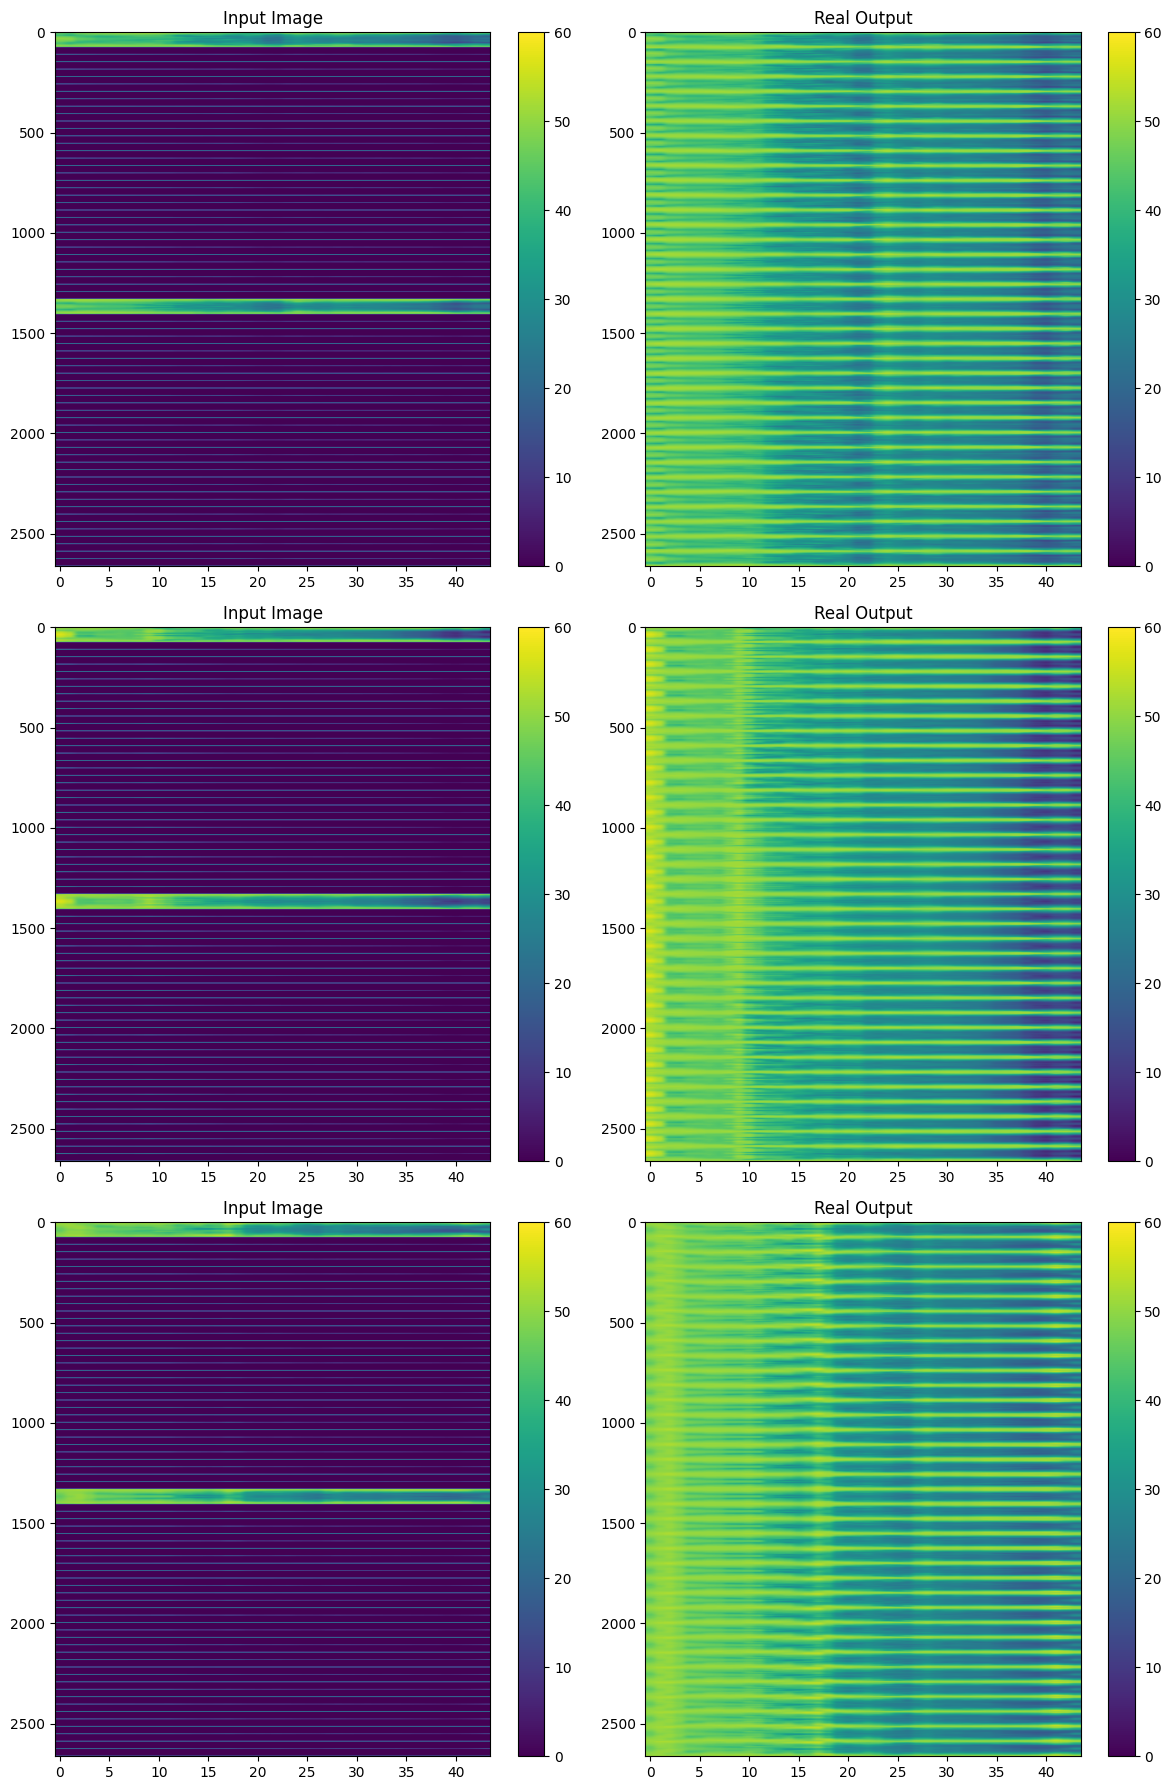

In [30]:
plot_images(entradas[0:3], salidas[0:3], vmin=0, vmax=60)

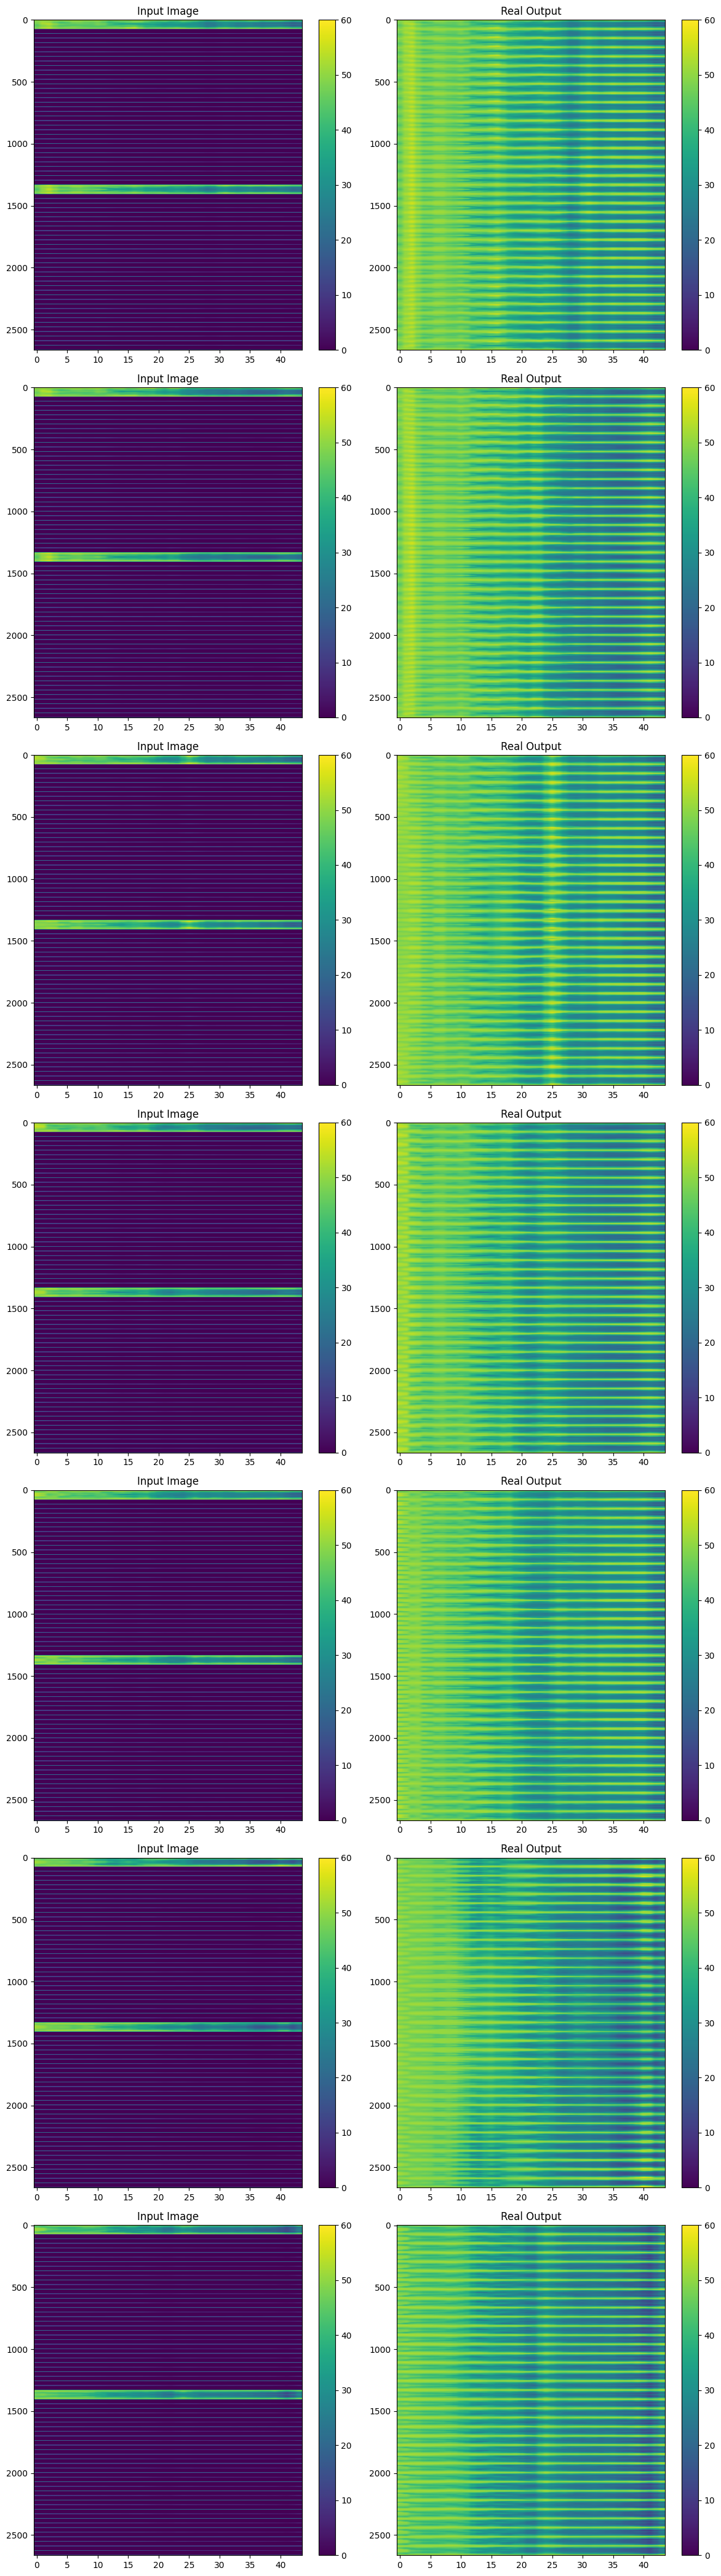

In [31]:
plot_images(entradas[3:], salidas[3:], vmin=0, vmax=60)

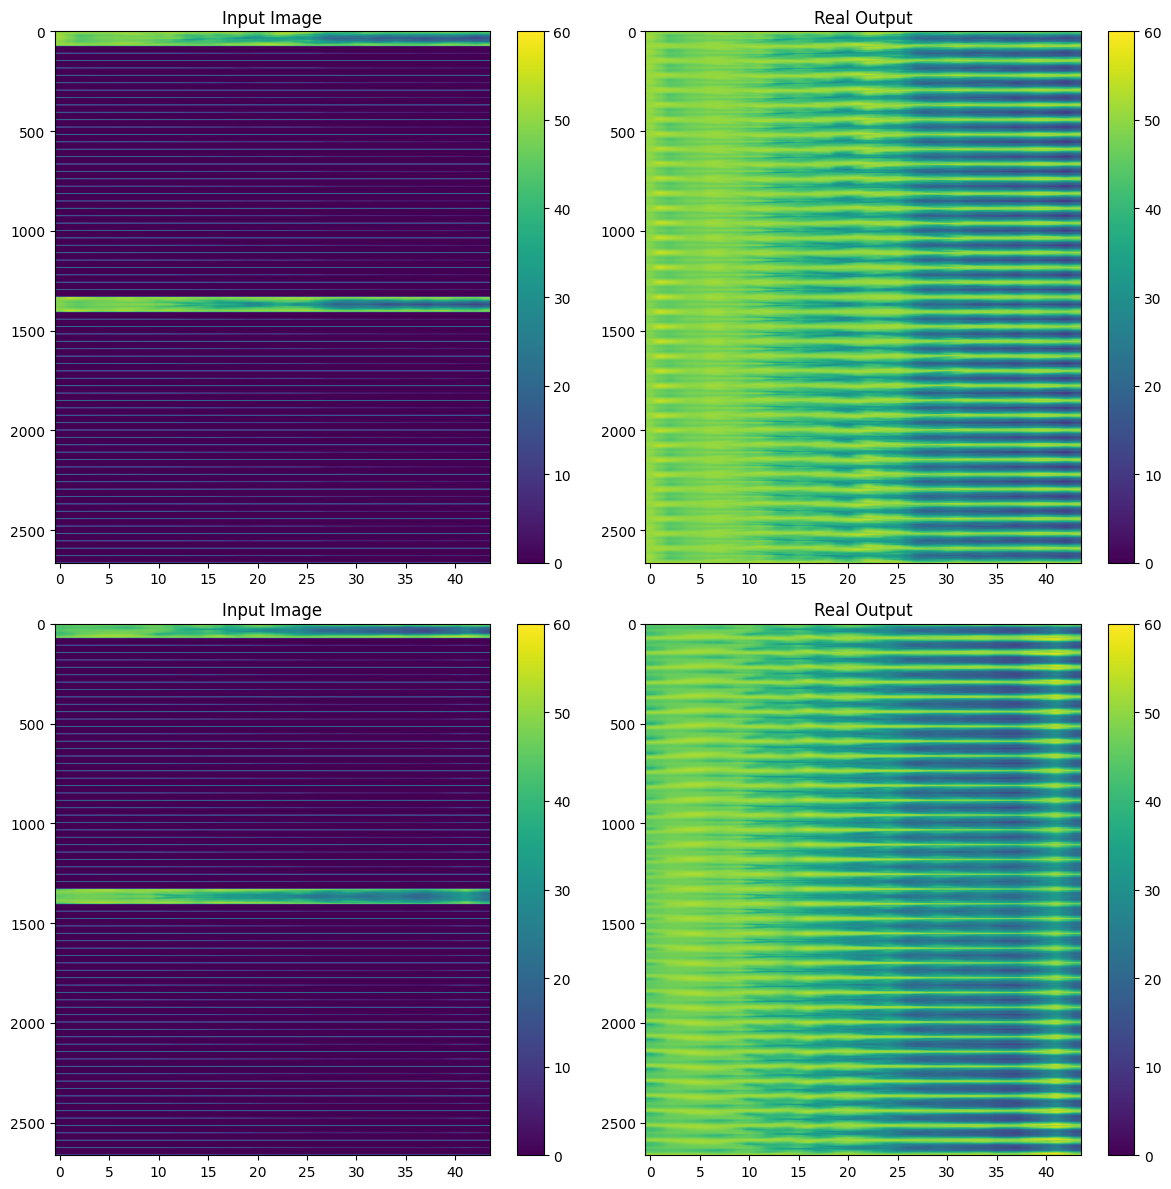

In [32]:
plot_images(x_test, y_test, vmin=0, vmax=60)

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(entradas, salidas, test_size=0.2, random_state=0)

print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_val: ", x_val.shape)
print("y_val: ", y_val.shape)

x_train:  (8, 2664, 44)
y_train:  (8, 2664, 44)
x_val:  (2, 2664, 44)
y_val:  (2, 2664, 44)


In [34]:
IMG_WIDTH = 44
IMG_HEIGHT = 2664
IMG_CHANNELS = 1

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt


In [45]:
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=(75, 3), stride=(2, 1), padding="valid"),
            nn.LeakyReLU(),
            nn.Conv2d(16, 32, kernel_size=(75, 3), stride=(2, 2), padding="valid"),
            nn.LeakyReLU(),
            nn.Conv2d(32, 64, kernel_size=(75, 3), stride=(2, 2), padding="valid"),
            nn.LeakyReLU(),
            nn.Conv2d(64, 128, kernel_size=(75, 3), stride=(2, 2), padding="valid"),
            nn.LeakyReLU(),
            nn.Conv2d(128, 256, kernel_size=(75, 3), stride=(2, 2), padding="valid"),
            nn.LeakyReLU()
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(2, 2), padding=1, output_padding=1),
            nn.LeakyReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=1, output_padding=1),
            nn.LeakyReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(2, 2), padding=1, output_padding=1),
            nn.LeakyReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=1, output_padding=1),
            nn.LeakyReLU(),
            nn.Conv2d(16, 1, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x1 = self.encoder(x)
        output = self.decoder(x1)
        return output


In [43]:
class BalloonDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        input_image = torch.tensor(self.inputs[idx], dtype=torch.float32).unsqueeze(0)
        target_image = torch.tensor(self.targets[idx], dtype=torch.float32).unsqueeze(0)
        return input_image, target_image

# Asumiendo que 'x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test' son ndarrays
train_dataset = BalloonDataset(x_train, y_train)
val_dataset = BalloonDataset(x_val, y_val)
test_dataset = BalloonDataset(x_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)


In [44]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNet().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    val_loss = 0
    model.eval()
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()
    
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss/len(train_loader)}, Val Loss: {val_loss/len(val_loader)}')


c:\Users\vcatala\Anaconda3\envs\tf_gpu\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([4, 1, 2664, 44])) that is different to the input size (torch.Size([4, 1, 2672, 48])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (48) must match the size of tensor b (44) at non-singleton dimension 3